This notebook contains analysis and visualizations of data from https://datarepository.wolframcloud.com/resources/Sample-Data-Animal-Weights. The animal weigth csv file contains data on Species, body weight, and brain weight.

In [400]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math as math
import scipy.stats as stats
import numpy as np

In [363]:
animal = pd.read_csv("Sample-Data-Animal-Weights.csv")
#nimal = pd.read_excel("Sample-Data-Animal-Weights.xlsx", sheet_name="Sample-Data-Animal-Weights")
animal.head()

,Species,BodyWeight,BrainWeight
0,MountainBeaver,"Quantity[1.35, ""Kilograms""]","Quantity[8.1, ""Grams""]"
1,Cow,"Quantity[465, ""Kilograms""]","Quantity[423, ""Grams""]"
2,GreyWolf,"Quantity[36.33, ""Kilograms""]","Quantity[119.5, ""Grams""]"
3,Goat,"Quantity[27.66, ""Kilograms""]","Quantity[115, ""Grams""]"
4,GuineaPig,"Quantity[1.04, ""Kilograms""]","Quantity[5.5, ""Grams""]"


In [364]:
animal.shape

(28, 3)

In [365]:
animal = animal.sort_values(by='Species')
animal.head()

,Species,BodyWeight,BrainWeight
14,AfricanElephant,"Quantity[6654, ""Kilograms""]","Quantity[5712, ""Grams""]"
6,AsianElephant,"Quantity[2547, ""Kilograms""]","Quantity[4603, ""Grams""]"
25,Brachiosaurus,"Quantity[87000, ""Kilograms""]","Quantity[154.5, ""Grams""]"
10,Cat,"Quantity[3.3, ""Kilograms""]","Quantity[25.6, ""Grams""]"
23,Chimpanzee,"Quantity[52.16, ""Kilograms""]","Quantity[440, ""Grams""]"


The Body and Brain Weight columns need to have the numbers extracted from the text. I'd also like to change the column names to include the units of measurment. So, I'll
1) Extract the numeric values
2) Modify column names

In [366]:
animal["BodyWeight_kg"] = animal.BodyWeight.str.extract('(\d+)')
animal["BrainWeight_grams"] = animal.BrainWeight.str.extract('(\d+)')

In [367]:
animal.head(2)

,Species,BodyWeight,BrainWeight,BodyWeight_kg,BrainWeight_grams
14,AfricanElephant,"Quantity[6654, ""Kilograms""]","Quantity[5712, ""Grams""]",6654,5712
6,AsianElephant,"Quantity[2547, ""Kilograms""]","Quantity[4603, ""Grams""]",2547,4603


In [368]:
animal = animal.drop(["BodyWeight", "BrainWeight"], axis=1)

In [369]:
animal.head(2)

,Species,BodyWeight_kg,BrainWeight_grams
14,AfricanElephant,6654,5712
6,AsianElephant,2547,4603


In [370]:
animal["BodyWeight_kg"] = animal["BodyWeight_kg"].astype(int)
animal["BrainWeight_grams"] = animal["BrainWeight_grams"].astype(int)
animal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 14 to 15
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Species            28 non-null     object
 1   BodyWeight_kg      28 non-null     int64 
 2   BrainWeight_grams  28 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 896.0+ bytes


In [371]:
animal

,Species,BodyWeight_kg,BrainWeight_grams
14,AfricanElephant,6654,5712
6,AsianElephant,2547,4603
25,Brachiosaurus,87000,154
10,Cat,3,25
23,Chimpanzee,52,440
1,Cow,465,423
5,Diplodocus,11700,50
7,Donkey,187,419
11,Giraffe,529,680
3,Goat,27,115


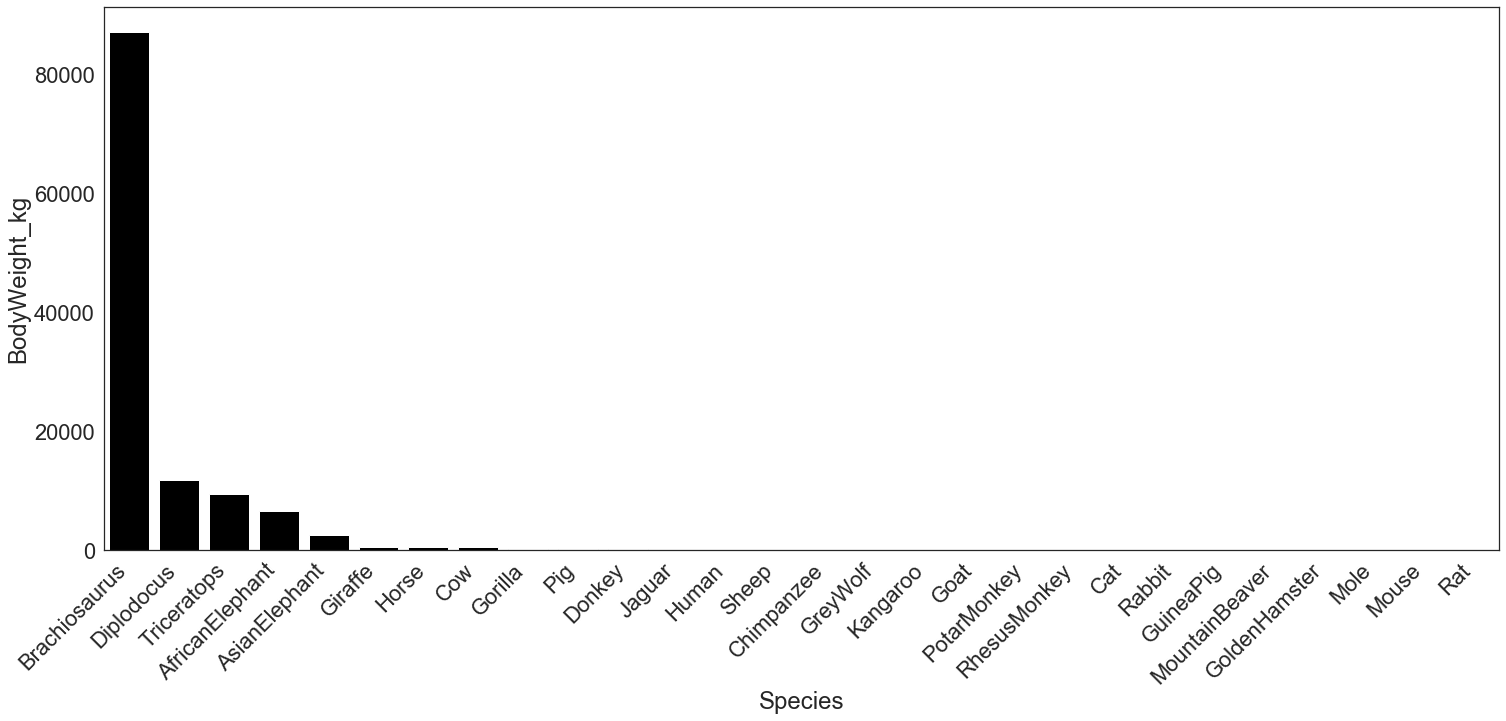

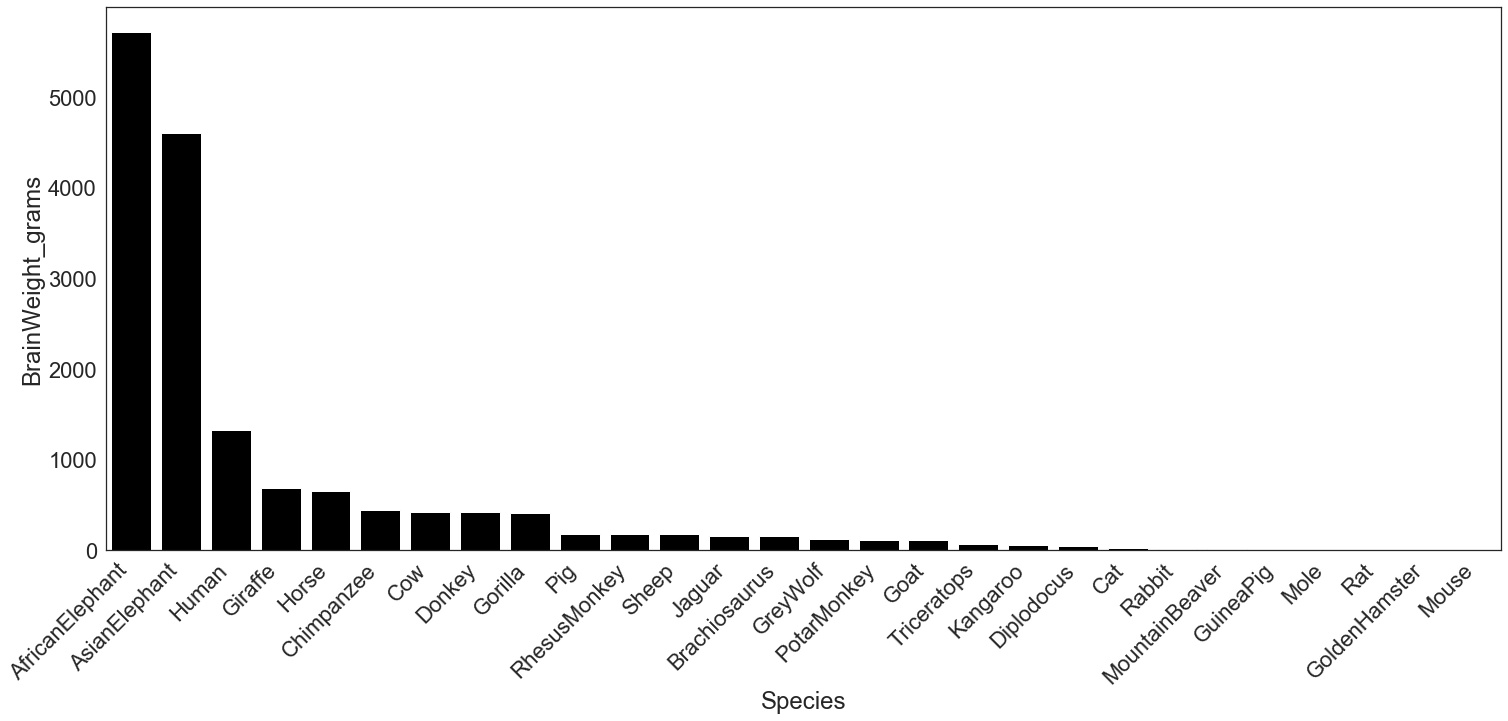

In [372]:
#Make barplots of weights vs. species
columns = ["BodyWeight_kg", "BrainWeight_grams"]
for i in columns:
    ax = sns.barplot("Species", i, data=animal.sort_values(i, ascending=False), color="black")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.rcParams["figure.figsize"] = [25, 10]
    plt.show()

I'll remove the dinosaurs from the lists (i.e. Diplodocus, Triceratops, and Brachiosaurus)

In [373]:
animal = animal.drop([5, 15, 25])

Index(['Species', 'BodyWeight_kg', 'BrainWeight_grams'], dtype='object')

In [374]:
animal.values

array([['AfricanElephant', 6654, 5712],
       ['AsianElephant', 2547, 4603],
       ['Cat', 3, 25],
       ['Chimpanzee', 52, 440],
       ['Cow', 465, 423],
       ['Donkey', 187, 419],
       ['Giraffe', 529, 680],
       ['Goat', 27, 115],
       ['GoldenHamster', 0, 1],
       ['Gorilla', 207, 406],
       ['GreyWolf', 36, 119],
       ['GuineaPig', 1, 5],
       ['Horse', 521, 655],
       ['Human', 62, 1320],
       ['Jaguar', 100, 157],
       ['Kangaroo', 35, 56],
       ['Mole', 0, 3],
       ['MountainBeaver', 1, 8],
       ['Mouse', 0, 0],
       ['Pig', 192, 180],
       ['PotarMonkey', 10, 115],
       ['Rabbit', 2, 12],
       ['Rat', 0, 1],
       ['RhesusMonkey', 6, 179],
       ['Sheep', 55, 175]], dtype=object)

Now I'll make the bar graphs again without the dinosaurs

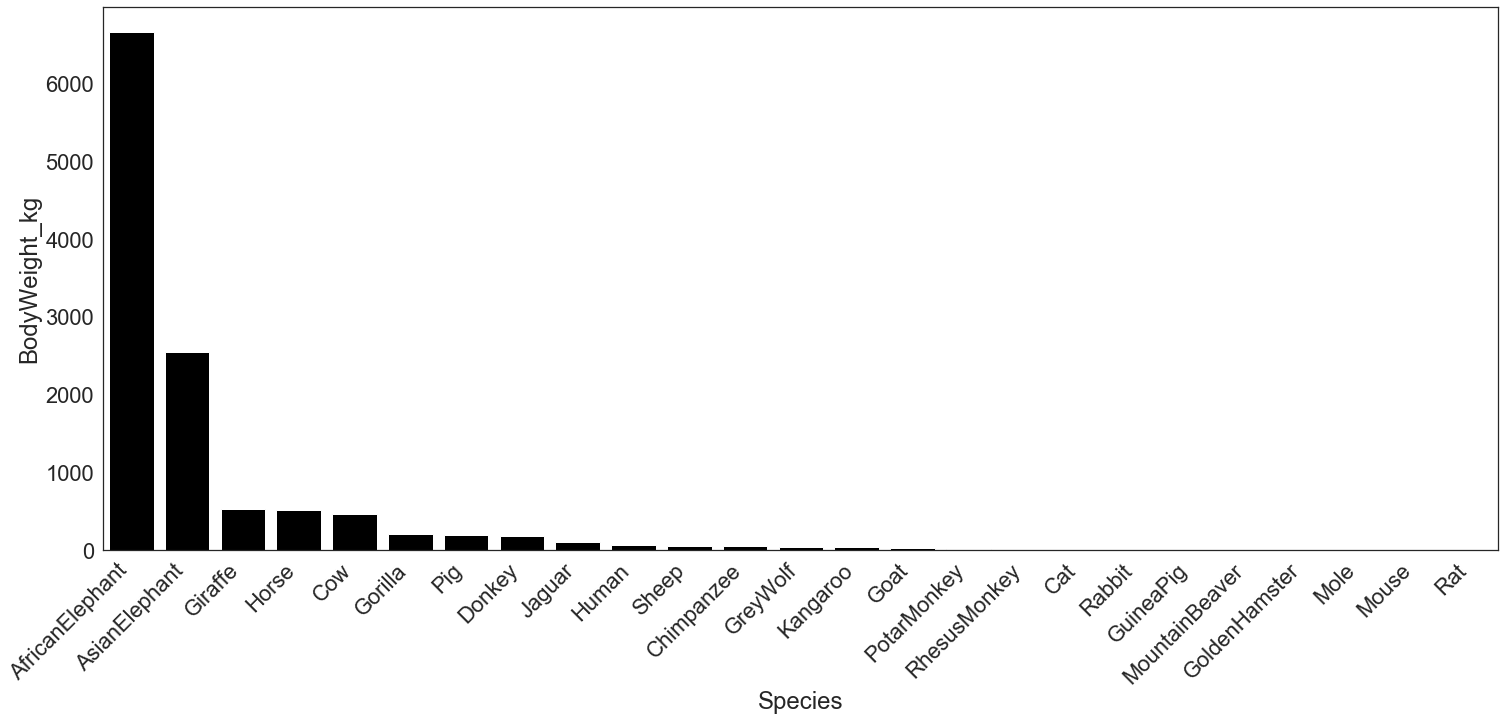

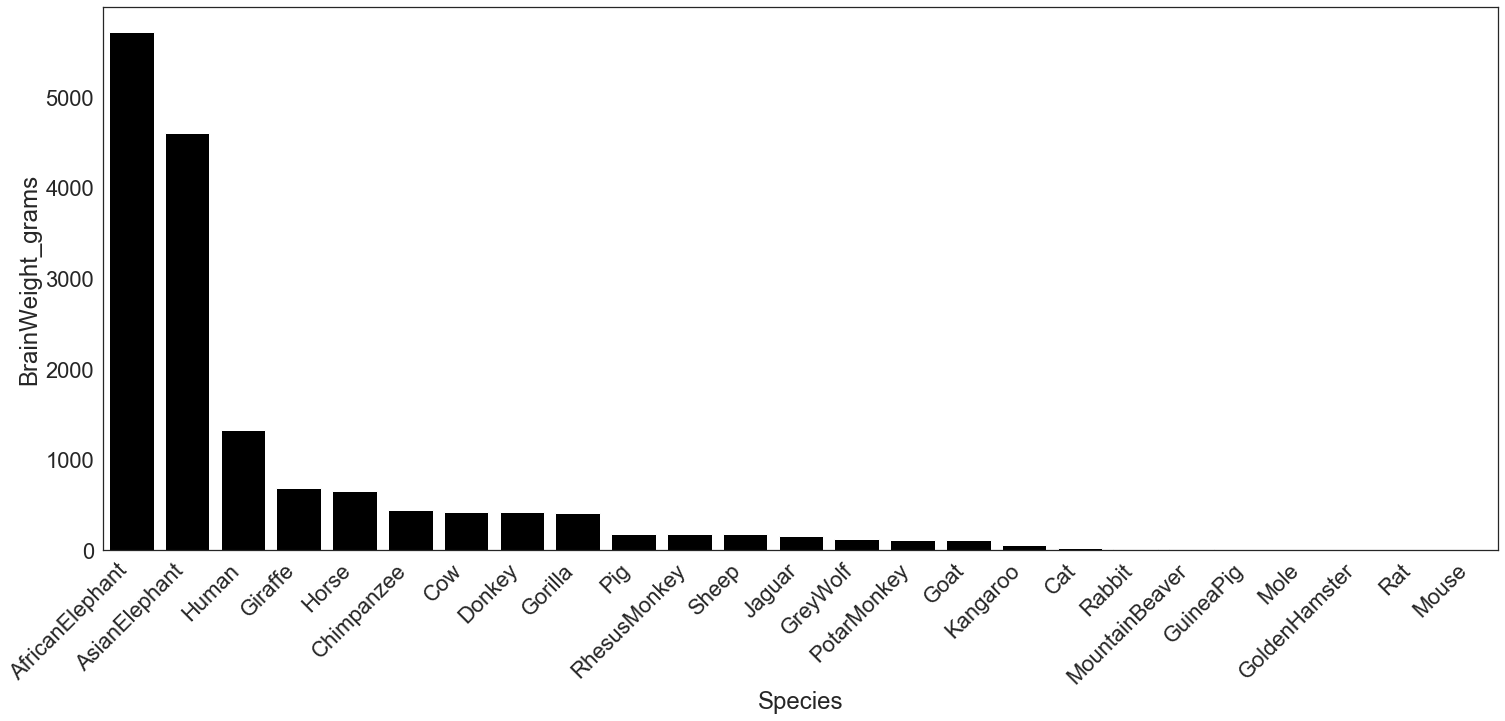

In [375]:
#Make barplots of weights vs. species
columns = ["BodyWeight_kg", "BrainWeight_grams"]
for i in columns:
    ax = sns.barplot("Species", i, data=animal.sort_values(i, ascending=False), color="black")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.rcParams["figure.figsize"] = [25, 10]
    plt.show()

Now, I'll look at how the body weight and brain weight correlate with a scatter plot

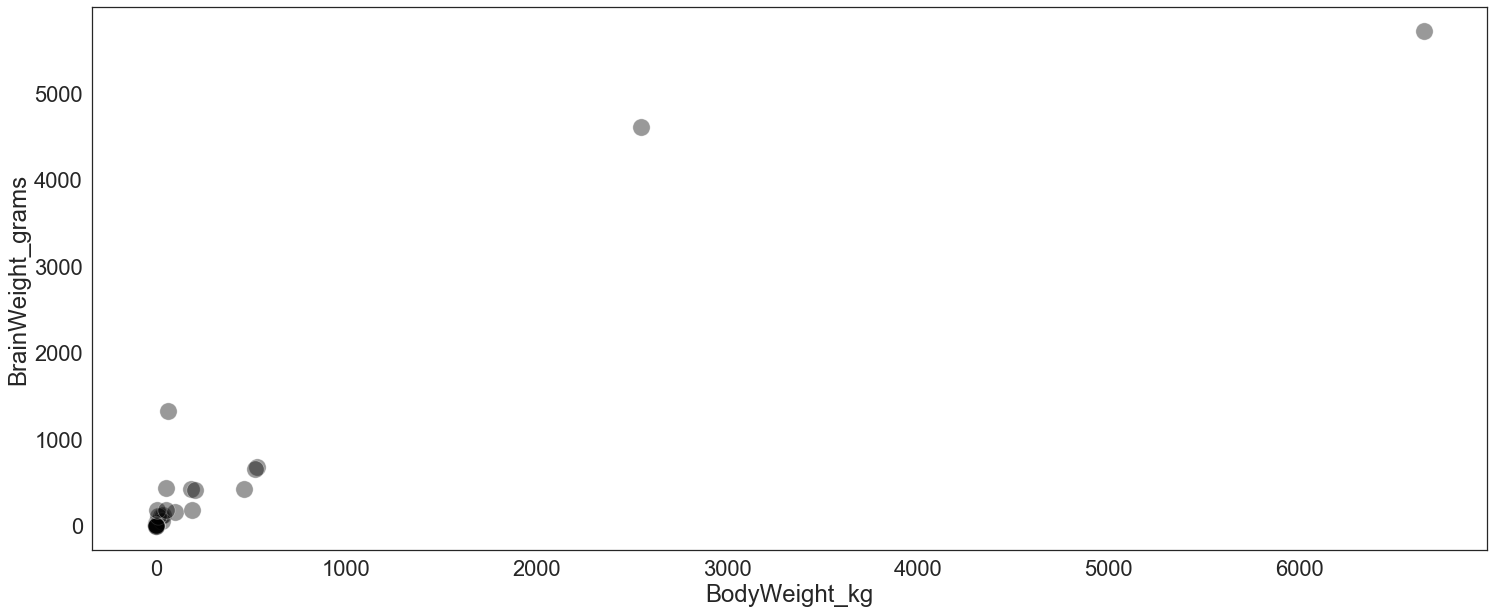

In [382]:
#Make the scatterplot
ax = sns.scatterplot("BodyWeight_kg", "BrainWeight_grams", data=animal, color="black", s=300, alpha=0.4)
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()

I'll use linear regression to inspect the brain vs. body weight correlation, fit to an equation, and find the coefficient of variation (R-squared).

r-squared: 0.8683499044465923
p-value: 1.3114597636210146e-11


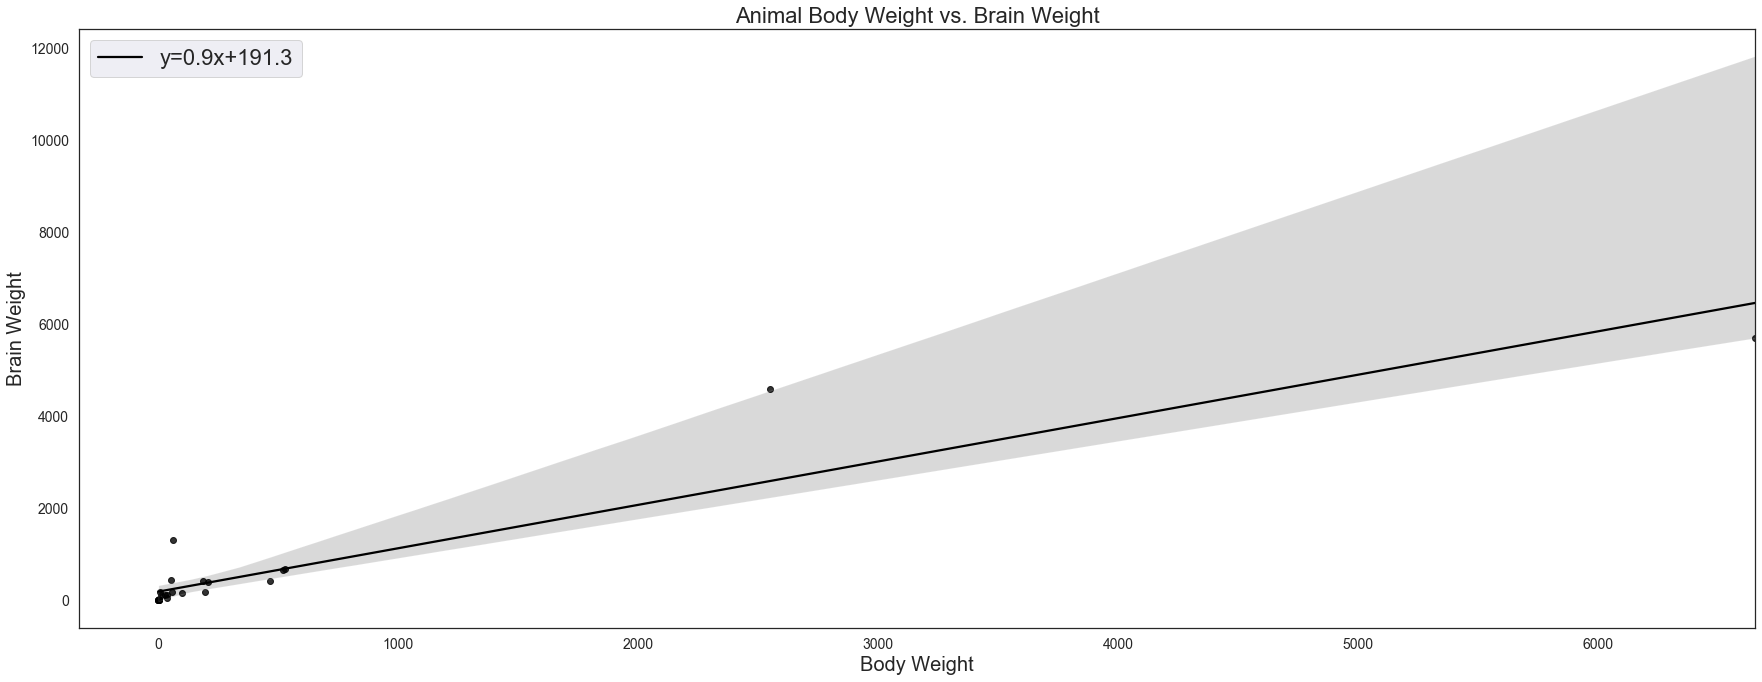

In [384]:
# get coeffs of linear fit
sns.set_style(style='white')

slope, intercept, r_value, p_value, std_err = stats.linregress(animal['BodyWeight_kg'], animal['BrainWeight_grams'])

#Plot the scatterplot
ax = sns.regplot(x="BodyWeight_kg", y="BrainWeight_grams", data=animal, color='black', 
                  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

#format the plot
sns.set(font_scale=2)
ax.axes.set_title("Animal Body Weight vs. Brain Weight",fontsize=22)
ax.set_xlabel("Body Weight",fontsize=20)
ax.set_ylabel("Brain Weight",fontsize=20)
ax.tick_params(labelsize=14)
plt.rcParams["figure.figsize"] = [12,12]
plt.tight_layout()

# plot legend
ax.legend(loc=2)
print ('r-squared:', r_value**2)
print ('p-value:', p_value)

plt.show()

The r-squared value of 0.87 suggests that most of the variance in the dependent variable (brain weight) is explained (i.e., predictable) from the independent variables (body weight). Which is what we would expect...a bigger animal also has a larger/heavier brain. The outlier is the human. Wow man, that's heavy!

I wonder how much a difference there is between our body to brain weight ratio to compared to other animals?

I'll create a new feature called "Ratio" that will be the ratio of brain weight/body weight. 
Note: I convert the grams to kg by dividing by 1000. 

I'll then make a new feature called "PercentBrain" for percentage of weight attributed to the brain of the animal. 

In [386]:
animal["BrainWeight_kg"] = animal["BrainWeight_grams"] / 1000

In [387]:
animal["Ratio"] = animal["BrainWeight_kg"] / animal["BodyWeight_kg"]
animal.head(2)

,Species,BodyWeight_kg,BrainWeight_grams,BrainWeight_kg,Ratio
14,AfricanElephant,6654,5712,5.712,0.000858
6,AsianElephant,2547,4603,4.603,0.001807


In [398]:
animal["PercentBrain"] = round((animal["Ratio"] * 100), 2)
animal

,Species,BodyWeight_kg,BrainWeight_grams,BrainWeight_kg,Ratio,PercentBrain
14,AfricanElephant,6654,5712,5.712,0.000858,0.09
6,AsianElephant,2547,4603,4.603,0.001807,0.18
10,Cat,3,25,0.025,0.008333,0.83
23,Chimpanzee,52,440,0.440,0.008462,0.85
1,Cow,465,423,0.423,0.000910,0.09
7,Donkey,187,419,0.419,0.002241,0.22
11,Giraffe,529,680,0.680,0.001285,0.13
3,Goat,27,115,0.115,0.004259,0.43
18,GoldenHamster,0,1,0.001,inf,inf
12,Gorilla,207,406,0.406,0.001961,0.20


I see that a few animals, such as the mouse, have such a small brain weight that the ratio and percentage result in an "inf" meaning these are infinitely samll numbers for python to handle. Therefore, I will replace these values with nan and then drop them from the dataset. 

In [403]:
animal = animal.replace([np.inf, -np.inf], np.nan)
animal.head(10)

,Species,BodyWeight_kg,BrainWeight_grams,BrainWeight_kg,Ratio,PercentBrain
14,AfricanElephant,6654,5712,5.712,0.000858,0.09
6,AsianElephant,2547,4603,4.603,0.001807,0.18
10,Cat,3,25,0.025,0.008333,0.83
23,Chimpanzee,52,440,0.440,0.008462,0.85
1,Cow,465,423,0.423,0.000910,0.09
7,Donkey,187,419,0.419,0.002241,0.22
11,Giraffe,529,680,0.680,0.001285,0.13
3,Goat,27,115,0.115,0.004259,0.43
18,GoldenHamster,0,1,0.001,NaN,NaN
12,Gorilla,207,406,0.406,0.001961,0.20


In [405]:
animal = animal.dropna()
animal.head(10)

,Species,BodyWeight_kg,BrainWeight_grams,BrainWeight_kg,Ratio,PercentBrain
14,AfricanElephant,6654,5712,5.712,0.000858,0.09
6,AsianElephant,2547,4603,4.603,0.001807,0.18
10,Cat,3,25,0.025,0.008333,0.83
23,Chimpanzee,52,440,0.440,0.008462,0.85
1,Cow,465,423,0.423,0.000910,0.09
7,Donkey,187,419,0.419,0.002241,0.22
11,Giraffe,529,680,0.680,0.001285,0.13
3,Goat,27,115,0.115,0.004259,0.43
12,Gorilla,207,406,0.406,0.001961,0.20
2,GreyWolf,36,119,0.119,0.003306,0.33


Now, I'll look at how PercentBrain relates to the animals...

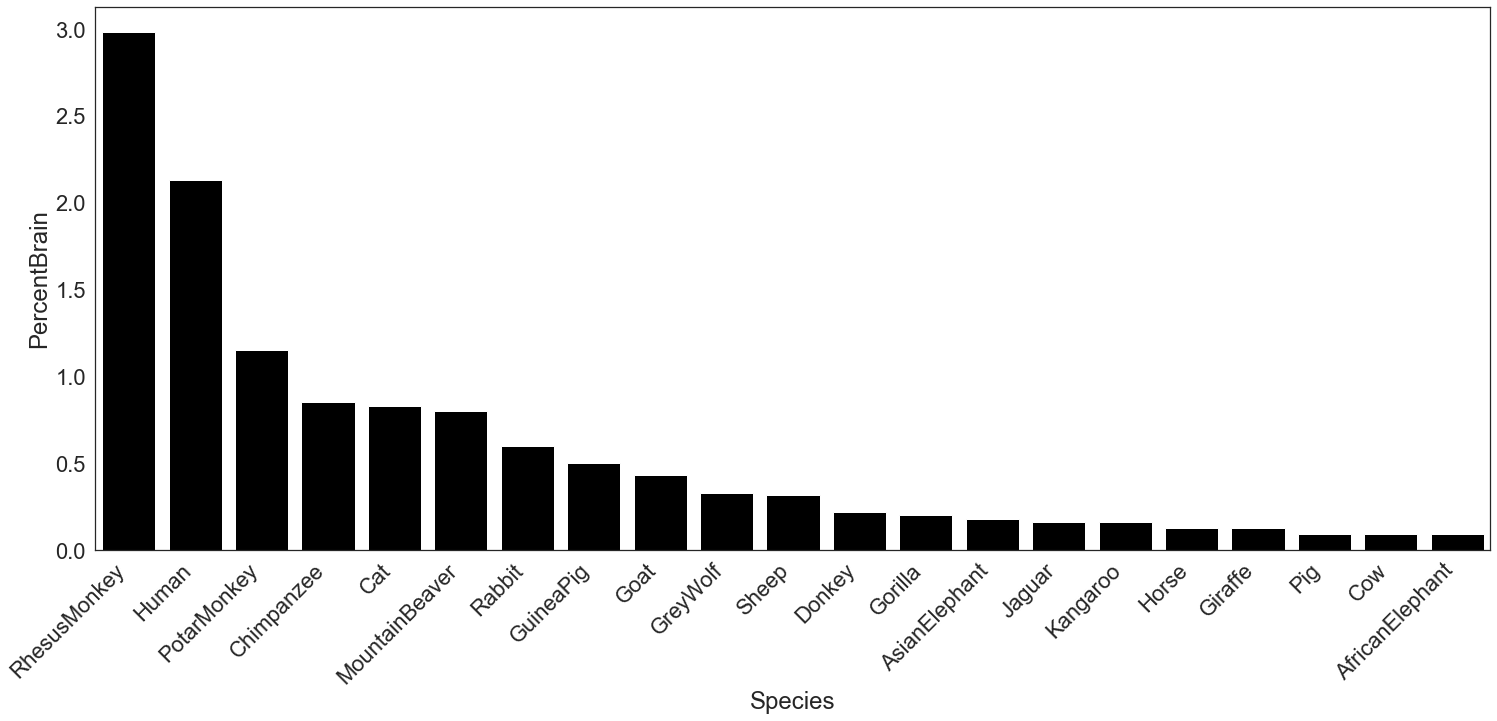

In [407]:
#Make barplot
sns.set_style(style='white')
ax = sns.barplot("Species", "PercentBrain", data=animal.sort_values("PercentBrain", ascending=False), color="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.rcParams["figure.figsize"] = [25, 10]
plt.show()